In [320]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.linear_model import LinearRegression
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

# Sigmoid Nueron Model Class

In [403]:
class sigmoid_model:
    def __init__(self):
        self.b=None
        self.w=None
    def sigmoid(self,x):
        return ( 1.0/(1.0 + np.exp(- (np.dot(x,self.w.T)  + self.b ) )) )
    def predict(self,X):
        Y_pred=[]
        for x in X:
            Y_pred.append( self.sigmoid(x) )
        return np.asarray(Y_pred)
    def compute_grad_w(self,x,y):
        return( (1-self.sigmoid(x)) * ( self.sigmoid(x) - y ) * ( self.sigmoid(x)) * (x))
    def compute_grad_b(self,x,y):
        return( (1-self.sigmoid(x)) * ( self.sigmoid(x) - y ) * ( self.sigmoid(x)) * (1.0))
    def fit(self,X,Y,learning_rate=1,epochs=1,initialize=True,display_loss=False):
        if(initialize):
            self.w=np.random.randn(1,X.shape[1])
            self.b=0
        if(display_loss):
            loss={}
        for epoch in tqdm_notebook(range(epochs),total=epochs,unit="epoch"):
            dw=0
            db=0
            for x,y in zip(X,Y):
                dw += self.compute_grad_w(x,y)
                db += self.compute_grad_b(x,y)
            self.w= self.w - (learning_rate * dw)
            self.b= self.b - (learning_rate * db)
            if(display_loss):
                Y_pred=self.sigmoid(X)
                loss[epoch]=mean_squared_error(Y_pred,Y)
        if(display_loss):
            loss.values()
            plt.plot(np.array(list(loss.values())).astype("float"))
            plt.xlabel('epochs')
            plt.ylabel('Mean Squared Loss')
            plt.show()
            

# Testing whether this model is working or not

In [146]:
sigmoid=sigmoid_model()

In [147]:
X=[[2,4],[5,3],[1,2],[7,10],[23,65]]
X=np.asarray(X)
Y=[1,1,0,0,1]

In [148]:
sigmoid.fit(X,Y,learning_rate=0.25,epochs=2)

In [149]:
Y_pred=sigmoid.predict(X)

In [150]:
Y_pred

array([0.99698995, 0.99958253, 0.94845359, 0.99999993, 1.        ])

# Now on Dataset

In [355]:
data=sklearn.datasets.load_boston()

In [356]:
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

# Splitting into X and Y

In [357]:
X=data.data

In [358]:
X=pd.DataFrame(X)

In [359]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [360]:
Y=data.target

In [361]:
Y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [362]:
X.shape

(506, 13)

In [363]:
Y.shape

(506,)

# Splitting into Test and Train Dataset

In [365]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=2)

In [367]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


# Standarization

In [368]:
scaler=StandardScaler()

In [369]:
X_scaled_train=scaler.fit_transform(X_train)

In [370]:
X_scaled_test=scaler.transform(X_test)

In [371]:
# Y_scaled_train=scaler.fit_transform(Y_train.reshape(-1,1))

In [372]:
# Y_scaled_test=scaler.transform(Y_test.reshape(-1,1))

In [373]:
print(X_scaled_train.shape)
print(X_scaled_test.shape)
# print(Y_scaled_train.shape)
# print(Y_scaled_test.shape)

(404, 13)
(102, 13)


In [385]:
Y_scaled_train

array([[0.40222222],
       [0.35555556],
       [0.33555556],
       [0.66      ],
       [0.19777778],
       [0.18888889],
       [0.37777778],
       [0.22666667],
       [0.13111111],
       [0.39333333],
       [0.19555556],
       [0.01333333],
       [0.55111111],
       [1.        ],
       [0.66444444],
       [0.34666667],
       [0.40888889],
       [0.31555556],
       [0.61555556],
       [0.32444444],
       [0.48888889],
       [0.07555556],
       [0.91111111],
       [0.37111111],
       [0.49111111],
       [0.32      ],
       [0.31777778],
       [0.44      ],
       [0.39111111],
       [0.59333333],
       [0.3       ],
       [0.08222222],
       [0.27555556],
       [0.41555556],
       [0.18444444],
       [0.12222222],
       [0.17111111],
       [0.44444444],
       [0.32666667],
       [0.22      ],
       [0.42666667],
       [0.44444444],
       [0.22      ],
       [0.26666667],
       [0.23555556],
       [0.17111111],
       [0.43333333],
       [0.222

# Our sigmoid model returns values only between 0 & 1. So Y needs to be transformed

In [374]:
minmax=MinMaxScaler()

In [375]:
Y_scaled_train=minmax.fit_transform(Y_train.reshape(-1,1))

In [376]:
Y_scaled_test=minmax.transform(Y_test.reshape(-1,1))

In [377]:
print(Y_scaled_train.shape)
print(Y_scaled_test.shape)

(404, 1)
(102, 1)


In [378]:
print(Y_scaled_train.min())
print(Y_scaled_test.min())
print(Y_scaled_train.max())
print(Y_scaled_train.max())

0.0
0.0
1.0
1.0


# Now everything is ready

In [404]:
sigmoid=sigmoid_model()

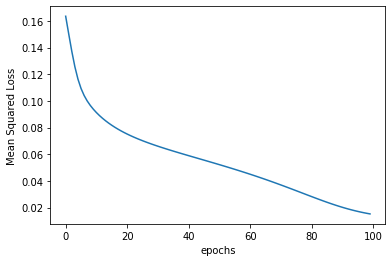

In [454]:
sigmoid.fit(X_scaled_train,Y_scaled_train,learning_rate=0.01,epochs=100,display_loss=True)

In [455]:
Y_pred=sigmoid.predict(X_scaled_test)

In [456]:
Y_pred.shape

(102, 1)

In [457]:
accuracy=mean_squared_error(Y_pred,Y_scaled_test)

In [458]:
accuracy

0.010831960127334637

In [461]:
print('The value of W is:',sigmoid.w)
print('The value if B is:',sigmoid.b)

The value of W is: [[-0.36435333 -0.07921733  0.14279165  0.12516393 -0.24970308  0.78126492
   0.13517    -0.0289067   0.0810482  -0.07469281 -0.04003987  0.03808576
  -0.41255656]]
The value if B is: [-0.71338855]
